In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection and Processing

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 26.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1


In [17]:
!ls /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1

gld_price_data.csv


In [18]:
gold_data = pd.read_csv("/root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1/gld_price_data.csv")

In [19]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
gold_data.shape

(2290, 6)

In [23]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [25]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [27]:
gold_data = gold_data.drop(columns = ['Date'])
correlation = gold_data.corr()

<Axes: >

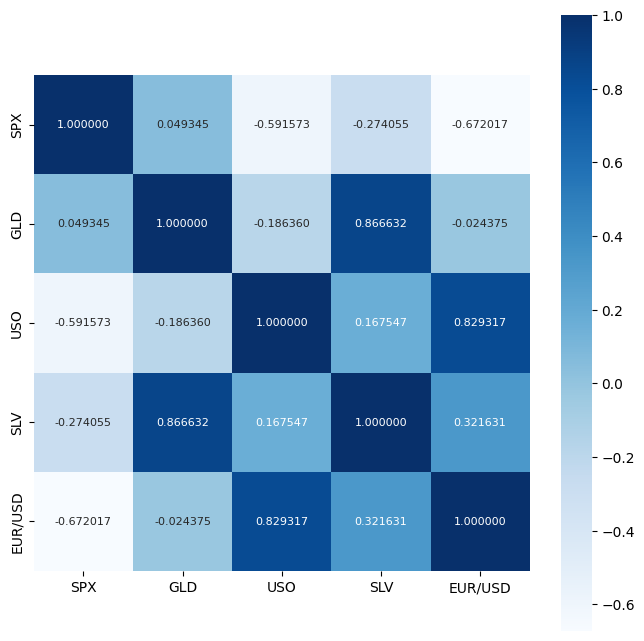

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True, cbar=True, square=True, fmt='1f', annot_kws={'size':8}, cmap='Blues')

In [39]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-202107428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='red')


<Axes: xlabel='GLD', ylabel='Density'>

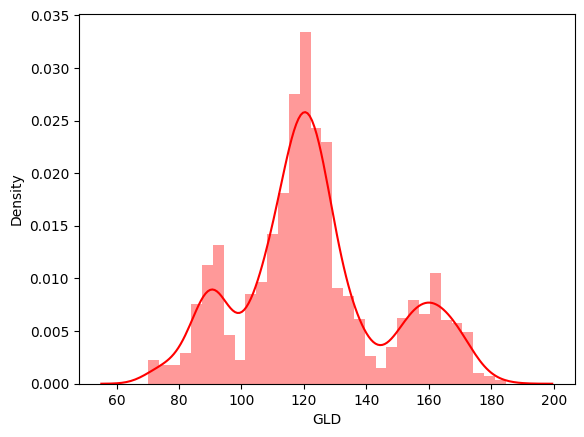

In [45]:
sns.distplot(gold_data['GLD'], color='red')

Spliiting the features and target

In [49]:
X = gold_data.drop(['GLD'], axis=1)
y = gold_data['GLD']

In [50]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [53]:
regressor = RandomForestRegressor(n_estimators=100)

In [54]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [56]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.67299942  81.66430014 116.08419981 127.56590085 120.76700123
 154.69219694 150.50159781 126.16759977 117.47209871 125.98790053
 116.672501   171.98450088 141.61319873 167.6364987  115.29470032
 117.26740034 138.77730239 169.99240074 159.94410229 159.03089925
 155.11510049 125.7719004  176.26899945 157.17300431 125.25950037
  93.93689968  77.0887004  120.65150007 119.01659888 167.42820008
  88.11740091 125.25920021  91.19120087 117.69510036 121.17689934
 136.87730155 115.67390126 115.50940095 149.06869948 107.24840131
 103.65150256  87.30679798 126.53530099 118.02019958 152.19109881
 119.60220002 108.38289998 107.99349777  93.13680082 127.17089772
  74.4656007  113.76939956 121.35850018 111.37749909 118.82229891
 120.49349931 159.63260046 167.31480119 147.1060968   85.99289895
  94.41350051  86.76909898  90.43860034 118.98160049 126.48160084
 127.52199981 169.51269958 122.26169913 117.29049888  98.58270047
 167.95350045 143.01989799 132.62870224 121.28650223 121.11939966
 119.61170

In [59]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9889409106417816


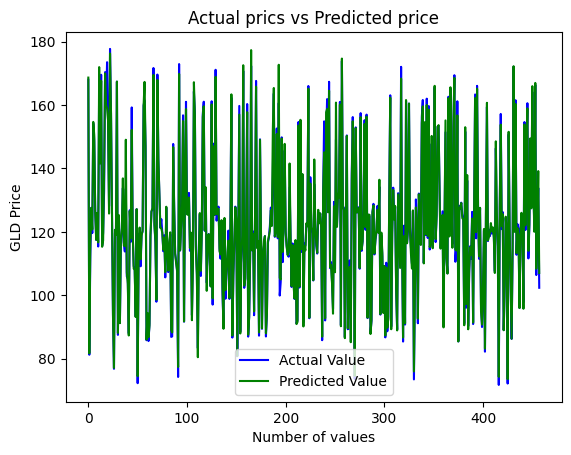

In [60]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual prics vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()